# Learning Features

## Task 1

In [1]:
import h5py
import pandas as pd
f = h5py.File('./data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')
treeArray = f['t_allpar_new'][()]

In [2]:
labels = ['j_q','j_g','j_w','j_z','j_t']

In [3]:
label_df = pd.DataFrame(treeArray,columns=labels)

In [4]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119909 entries, 0 to 5119908
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   j_q     int32
 1   j_g     int32
 2   j_w     int32
 3   j_z     int32
 4   j_t     int32
dtypes: int32(5)
memory usage: 97.7 MB


In [5]:
label_table = pd.DataFrame(columns=['Label','Number of jets','Description'], data=[['Total',label_df.shape[0],'Total statistics'],['q',label_df.j_q.sum(),'Light-quark jet'],['g',label_df.j_g.sum(),'Gluon jet'],['w',label_df.j_w.sum(),'W-boson jet'],['z',label_df.j_z.sum(),'Z-boson jet'],['t',label_df.j_t.sum(),'Top-quark jet'],['undef',0,'Undefined jet']])
label_table

,Label,Number of jets,Description
0,Total,5119909,Total statistics
1,q,777373,Light-quark jet
2,g,1390520,Gluon jet
3,w,798451,W-boson jet
4,z,834146,Z-boson jet
5,t,1319419,Top-quark jet
6,undef,0,Undefined jet


## Task 2

In [6]:
import matplotlib.pyplot as plt

In [7]:
kinematics = ['j_mass_mmdt', 'j_pt', 'j_eta']
substructures = ['j_zlogz', 'j_multiplicity']
EC_funcs = ['j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt','j_d2_b1_mmdt','j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt','j_m2_b1_mmdt', 'j_m2_b2_mmdt','j_n2_b1_mmdt', 'j_n2_b2_mmdt',]

In [8]:
hfeat_df = pd.DataFrame(treeArray,columns=labels+kinematics+substructures+EC_funcs)

In [9]:
def hist_plot(df,feat_list,bins,log=False):
    row = len(feat_list)
    column = 1
    fig = plt.figure(figsize=[8,6*row])
    for i, feat in enumerate(feat_list):
        ax = fig.add_subplot(row,column,i+1)
        ax.hist(df[hfeat_df.j_q==1][feat], bins,density=True,histtype='step',label='Quark',log=log)
        ax.hist(df[hfeat_df.j_g==1][feat], bins,density=True,histtype='step',label='Gluon',log=log)
        ax.hist(df[hfeat_df.j_w==1][feat], bins,density=True,histtype='step',label='W-boson',log=log)
        ax.hist(df[hfeat_df.j_z==1][feat], bins,density=True,histtype='step',label='Z-boson',log=log)
        ax.hist(df[hfeat_df.j_t==1][feat], bins,density=True,histtype='step',label='Top-quark',log=log)
        ax.legend()
        ax.set_xlabel(feat)
        ax.set_ylabel('Prob. Density(a.u.)')

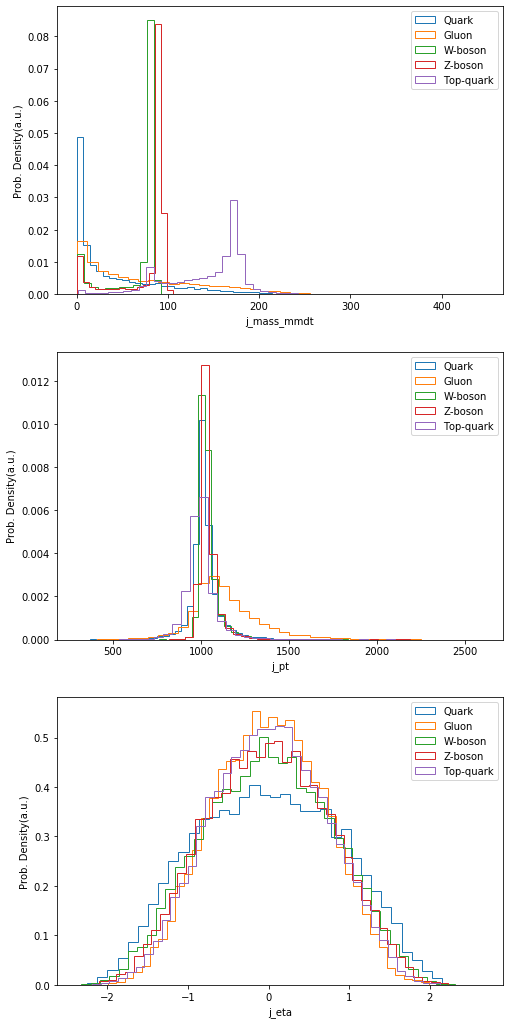

In [10]:
hist_plot(hfeat_df,kinematics,40)

# Task 3

In [11]:
lfeats = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 'j1_e1mcosthetarel']

In [12]:
lfeat_df = pd.DataFrame(treeArray,columns=labels+lfeats)

In [ ]:
hist_plot(lfeat_df,lfeats,40,log=True)

In [ ]:
# 2D plots
from matplotlib.colors import LogNorm
def hist2d_plot(df,labels,bins, rot=True):
    row = len(labels)
    column = 1
    fig = plt.figure(figsize=[8,6*row])
    if rot:
        for i, feat in enumerate(labels):
            ax = fig.add_subplot(row,column,i+1)
            img = ax.hist2d(x=df[df[feat]==1].j1_etarot, y=df[df[feat]==1].j1_phirot,weights=df[df[feat]==1].j1_ptrel,bins=bins,norm=LogNorm()) 

            ax.set_title('Histogram2D for '+feat+ ' weighted by j1_ptrel')
            ax.set_xlabel('j1_etarot')
            ax.set_ylabel('j1_phirot')
    else:
        for i, feat in enumerate(labels):
            ax = fig.add_subplot(row,column,i+1)
            img = ax.hist2d(x=df[df[feat]==1].j1_eta, y=df[df[feat]==1].j1_phi,weights=df[df[feat]==1].j1_ptrel,bins=bins,norm=LogNorm()) 

            ax.set_title('Histogram2D for '+feat+ ' weighted by j1_ptrel')
            ax.set_xlabel('j1_eta')
            ax.set_ylabel('j1_phi')

In [ ]:
# rotated eta&phi
hist2d_plot(lfeat_df,labels,[40,40],rot=True)

In [ ]:
# non-rotated eta&phi
hist2d_plot(lfeat_df,labels,[40,40],rot=False)